<a href="https://colab.research.google.com/github/RodzanIskandar/Strava-Data/blob/main/Strava_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main Google Drive folder
https://drive.google.com/drive/folders/1TOip2Qmii4wdW7POXf3d5wAwbvBf3N9V

In [1]:
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('/content/drive/MyDrive/Exploration Data Field/Personal Project/Strava/export_118123662/activities.csv')

# Run Dataset

In [3]:
pd.set_option('display.max_columns', None)
raw_df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Private Note,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,Type,Start Time,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,Jump Count,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Recovery,With Pet,Competition,Long Run,For a Cause,Media
0,9092683845,"May 18, 2023, 9:07:42 AM",Afternoon Run,Run,NaN,1599,3.10,NaN,NaN,False,NaN,NaN,activities/9092683845.gpx,NaN,NaN,1599.0,1418.0,3102.2,5.668,2.188,31.4,32.7,14.2,25.9,15.6,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.0,37.0,0.0,NaN,1.0,3198.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.940,0.0,NaN,NaN,NaN,3206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9217186095,"Jun 7, 2023, 12:02:57 AM",Morning Run,Run,NaN,2666,5.18,NaN,NaN,False,NaN,NaN,activities/9217186095.gpx,NaN,NaN,2666.0,2567.0,5184.2,4.558,2.020,0.0,0.0,20.8,21.6,1.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.0,5186.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.945,0.0,NaN,NaN,NaN,5366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9242022644,"Jun 10, 2023, 11:02:38 PM",Lazada Run,Run,NaN,4972,10.20,NaN,NaN,False,NaN,NaN,activities/9242022644.gpx,NaN,NaN,4972.0,4937.0,10207.7,9.056,2.068,13.0,12.7,36.1,43.1,4.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,10220.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.053,0.0,NaN,NaN,NaN,12072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9301114450,"Jun 20, 2023, 1:16:20 PM",Pfft restart again,Run,NaN,2014,3.30,NaN,NaN,False,NaN,NaN,activities/9301114450.gpx,NaN,NaN,2014.0,1409.0,3305.9,3.343,2.346,0.0,0.1,20.8,21.6,1.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3307.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.641,0.0,NaN,NaN,NaN,3420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10161721575,"Nov 4, 2023, 11:59:32 PM",Morning Walk,Walk,NaN,4093,5.05,NaN,NaN,False,NaN,NaN,activities/10161721575.gpx,NaN,NaN,4093.0,4065.0,5049.4,5.556,1.242,38.5,38.3,12.1,23.6,20.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.234,0.0,NaN,NaN,NaN,6682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Activity Filter

In [4]:
raw_df['Activity Type'].unique()

array(['Run', 'Walk', 'Hike'], dtype=object)

In [5]:
raw_df = raw_df[raw_df['Activity Type'] == 'Run']

## Distance filter (exclude bugs)

In [6]:
raw_df = raw_df[raw_df['Distance'] >= 1]

In [7]:
important_columns = ['Filename', 'Activity ID', 'Activity Type', 'Activity Description', 'Activity Date', 'Distance','Moving Time', 'Average Speed', 'Elapsed Time', 'Average Elapsed Speed', 'Total Steps']

In [8]:
df = raw_df[important_columns]

In [9]:
df.tail()

,Filename,Activity ID,Activity Type,Activity Description,Activity Date,Distance,Moving Time,Average Speed,Elapsed Time,Average Elapsed Speed,Total Steps
52,activities/16399380579.gpx,16399380579,Run,NaN,"Nov 8, 2025, 10:23:30 PM",19.20,9049.0,2.123,9767,1.966,23218.0
53,activities/16430154517.gpx,16430154517,Run,NaN,"Nov 11, 2025, 10:41:42 PM",5.55,2231.0,2.488,2266,2.449,5752.0
54,activities/16500319765.gpx,16500319765,Run,NaN,"Nov 18, 2025, 11:57:11 PM",3.38,1222.0,2.769,1229,2.753,3270.0
55,activities/16538462002.gpx,16538462002,Run,NaN,"Nov 22, 2025, 10:16:53 PM",14.40,6483.0,2.222,6987,2.062,16550.0
56,activities/16587786810.gpx,16587786810,Run,NaN,"Nov 28, 2025, 1:24:35 AM",4.31,1633.0,2.639,1815,2.375,4166.0


In [10]:
df.describe()

,Activity ID,Distance,Moving Time,Average Speed,Elapsed Time,Average Elapsed Speed,Total Steps
count,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,36.000000
mean,1.389482e+10,6.414082,2917.673469,2.249245,3134.265306,2.094837,7240.555556
std,2.034141e+09,3.192473,1560.815777,0.213766,1641.728482,0.301747,4552.134585
min,9.092684e+09,2.100000,959.000000,1.770000,959.000000,1.228000,2360.000000
25%,1.322019e+10,5.020000,2025.000000,2.123000,2266.000000,1.966000,5152.000000
50%,1.413750e+10,5.360000,2399.000000,2.198000,2634.000000,2.076000,5594.000000
75%,1.546219e+10,6.860000,3120.000000,2.419000,3523.000000,2.235000,7758.000000
max,1.658779e+10,19.200000,9049.000000,2.769000,9767.000000,2.753000,23218.000000


columns descriptions:
1. Activity_id
2. Distance = distance in km
3. Elapsed time = from start to end in seconds
4. Moving time = part of elapsed time when user moving
5. Average Speed = speed in m/s

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 56
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Filename               49 non-null     object 
 1   Activity ID            49 non-null     int64  
 2   Activity Type          49 non-null     object 
 3   Activity Description   16 non-null     object 
 4   Activity Date          49 non-null     object 
 5   Distance               49 non-null     float64
 6   Moving Time            49 non-null     float64
 7   Average Speed          49 non-null     float64
 8   Elapsed Time           49 non-null     int64  
 9   Average Elapsed Speed  49 non-null     float64
 10  Total Steps            36 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 4.6+ KB


In [12]:
df['Activity Date Modified'] = pd.to_datetime(df['Activity Date'], format="%b %d, %Y, %I:%M:%S %p")
df['Activity Date Modified Local'] = df['Activity Date Modified'] + timedelta(hours=7)

/tmp/ipython-input-4129772428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activity Date Modified'] = pd.to_datetime(df['Activity Date'], format="%b %d, %Y, %I:%M:%S %p")
/tmp/ipython-input-4129772428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activity Date Modified Local'] = df['Activity Date Modified'] + timedelta(hours=7)


In [13]:
df['Average Pace'] = 60 / (df['Average Speed'] * (0.001 / (1 / 3600)) )
df['Average Elapsed Pace'] = 60 / (df['Average Elapsed Speed'] * (0.001 / (1 / 3600)) )

/tmp/ipython-input-2990528701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Pace'] = 60 / (df['Average Speed'] * (0.001 / (1 / 3600)) )
/tmp/ipython-input-2990528701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Elapsed Pace'] = 60 / (df['Average Elapsed Speed'] * (0.001 / (1 / 3600)) )


# Overtime data

In [15]:
df.tail()

,Filename,Activity ID,Activity Type,Activity Description,Activity Date,Distance,Moving Time,Average Speed,Elapsed Time,Average Elapsed Speed,Total Steps,Activity Date Modified,Activity Date Modified Local,Average Pace,Average Elapsed Pace
52,activities/16399380579.gpx,16399380579,Run,NaN,"Nov 8, 2025, 10:23:30 PM",19.20,9049.0,2.123,9767,1.966,23218.0,2025-11-08 22:23:30,2025-11-09 05:23:30,7.850526,8.477450
53,activities/16430154517.gpx,16430154517,Run,NaN,"Nov 11, 2025, 10:41:42 PM",5.55,2231.0,2.488,2266,2.449,5752.0,2025-11-11 22:41:42,2025-11-12 05:41:42,6.698821,6.805499
54,activities/16500319765.gpx,16500319765,Run,NaN,"Nov 18, 2025, 11:57:11 PM",3.38,1222.0,2.769,1229,2.753,3270.0,2025-11-18 23:57:11,2025-11-19 06:57:11,6.019020,6.054002
55,activities/16538462002.gpx,16538462002,Run,NaN,"Nov 22, 2025, 10:16:53 PM",14.40,6483.0,2.222,6987,2.062,16550.0,2025-11-22 22:16:53,2025-11-23 05:16:53,7.500750,8.082768
56,activities/16587786810.gpx,16587786810,Run,NaN,"Nov 28, 2025, 1:24:35 AM",4.31,1633.0,2.639,1815,2.375,4166.0,2025-11-28 01:24:35,2025-11-28 08:24:35,6.315524,7.017544


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

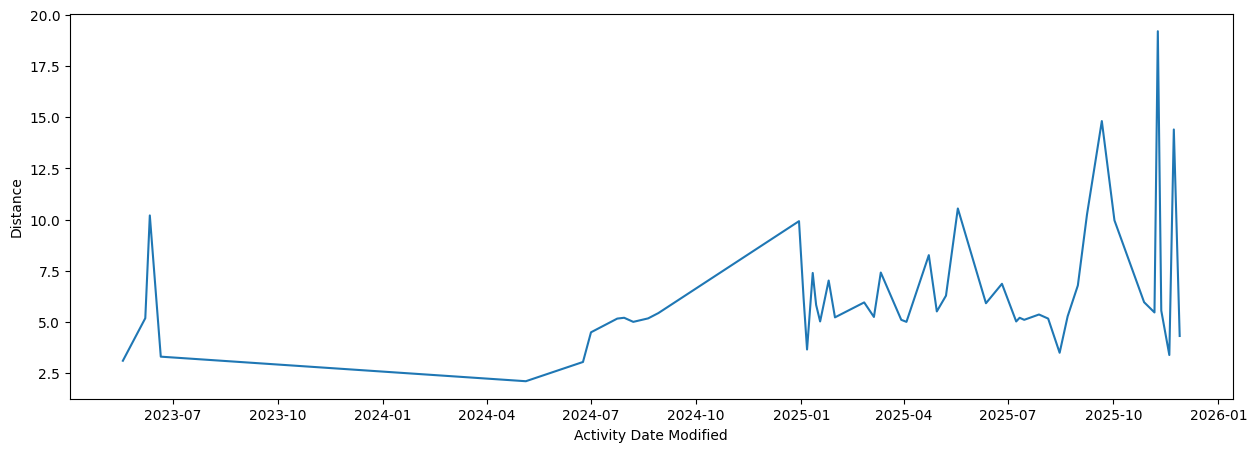

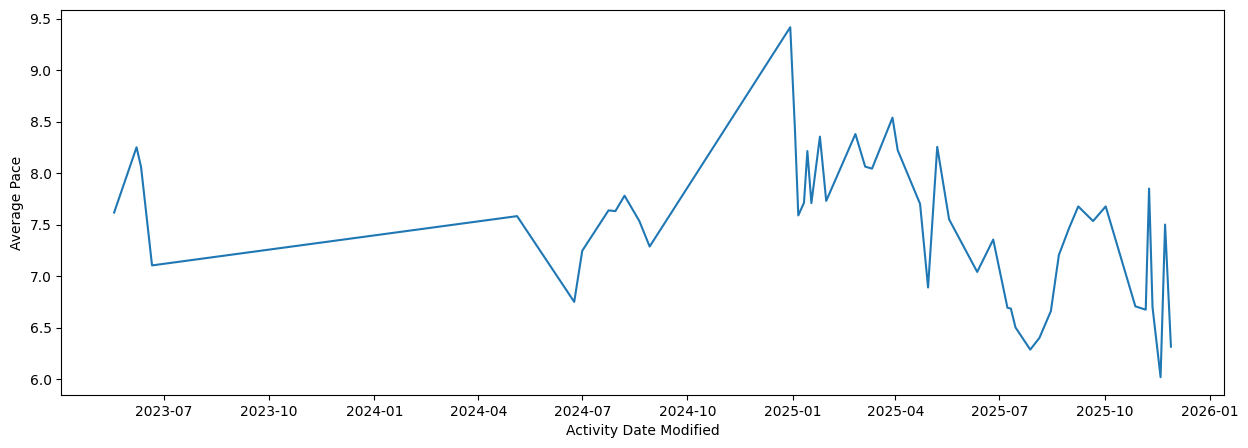

In [21]:
metrics_check_overtime = ['Distance', 'Average Pace']

for metric in metrics_check_overtime:

  plt.figure(figsize = (15, 5))
  sns.lineplot(y=df[metric], x=df['Activity Date Modified'])
  plt.show()


# Distance vs Pace

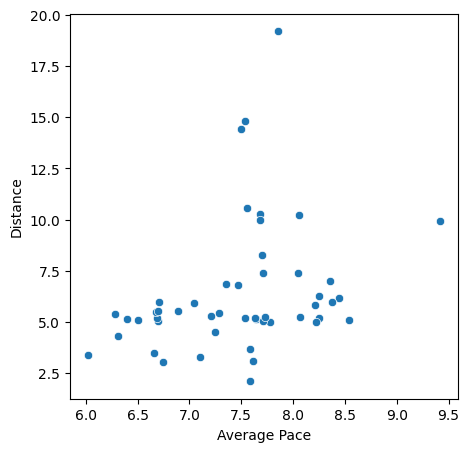

In [22]:
plt.figure(figsize = (5, 5))
sns.scatterplot(y=df['Distance'], x=df['Average Pace'])
plt.show()

# Average Pace Analysis

In [174]:
df.tail()

,Filename,Activity ID,Activity Type,Activity Description,Activity Date,Distance,Moving Time,Average Speed,Elapsed Time,Average Elapsed Speed,Total Steps,Activity Date Modified,Activity Date Modified Local,Average Pace
52,activities/16399380579.gpx,16399380579,Run,NaN,"Nov 8, 2025, 10:23:30 PM",19.20,9049.0,2.123,9767,1.966,23218.0,2025-11-08 22:23:30,2025-11-09 05:23:30,7.850526
53,activities/16430154517.gpx,16430154517,Run,NaN,"Nov 11, 2025, 10:41:42 PM",5.55,2231.0,2.488,2266,2.449,5752.0,2025-11-11 22:41:42,2025-11-12 05:41:42,6.698821
54,activities/16500319765.gpx,16500319765,Run,NaN,"Nov 18, 2025, 11:57:11 PM",3.38,1222.0,2.769,1229,2.753,3270.0,2025-11-18 23:57:11,2025-11-19 06:57:11,6.019020
55,activities/16538462002.gpx,16538462002,Run,NaN,"Nov 22, 2025, 10:16:53 PM",14.40,6483.0,2.222,6987,2.062,16550.0,2025-11-22 22:16:53,2025-11-23 05:16:53,7.500750
56,activities/16587786810.gpx,16587786810,Run,NaN,"Nov 28, 2025, 1:24:35 AM",4.31,1633.0,2.639,1815,2.375,4166.0,2025-11-28 01:24:35,2025-11-28 08:24:35,6.315524


# GPX Dataset

In [175]:
df.iloc[-2]

,55
Filename,activities/16538462002.gpx
Activity ID,16538462002
Activity Type,Run
Activity Description,NaN
Activity Date,"Nov 22, 2025, 10:16:53 PM"
Distance,14.4
Moving Time,6483.0
Average Speed,2.222
Elapsed Time,6987
Average Elapsed Speed,2.062


In [176]:
# for gpx_file in df.tail()['Filename']:

#   main_loc = "/content/drive/MyDrive/Exploration Data Field/Personal Project/Strava/export_118123662/"
#   gpx_loc = main_loc + gpx_file

gpx_file = df.iloc[-2]['Filename']
main_loc = "/content/drive/MyDrive/Exploration Data Field/Personal Project/Strava/export_118123662/"
gpx_loc = main_loc + gpx_file


In [177]:
gpx_loc

'/content/drive/MyDrive/Exploration Data Field/Personal Project/Strava/export_118123662/activities/16538462002.gpx'

In [178]:
# pip install gpxpy

In [179]:
import gpxpy

In [180]:
with open(gpx_loc, "r") as f:
    gpx = gpxpy.parse(f)

In [181]:
gpx

GPX(tracks=[GPXTrack(name='Morning Run 20251123', segments=[GPXTrackSegment(points=[...])])])

In [182]:
first_point = gpx.tracks[0].segments[0].points[0]

print("Latitude:", first_point.latitude)
print("Longitude:", first_point.longitude)
print("Elevation:", first_point.elevation)
print("Time:", first_point.time)

print("Extensions:", first_point.extensions)

Latitude: -6.238588
Longitude: 106.857148
Elevation: 23.5
Time: 2025-11-22 22:16:53+00:00
Extensions: []


In [183]:
points = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            points.append({
                "lat": point.latitude,
                "lon": point.longitude,
                "elev": point.elevation,
                "time": point.time
            })

In [184]:
gpx_df = pd.DataFrame(points)

In [185]:
gpx_df.head()

,lat,lon,elev,time
0,-6.238588,106.857148,23.5,2025-11-22 22:16:53+00:00
1,-6.238588,106.857148,23.5,2025-11-22 22:16:54+00:00
2,-6.238611,106.857133,23.5,2025-11-22 22:16:55+00:00
3,-6.238609,106.857123,23.5,2025-11-22 22:16:56+00:00
4,-6.238611,106.857119,23.5,2025-11-22 22:16:57+00:00


In [186]:
import gpxpy.geo

time_diff = []
distances = []
speeds = []

prev_point = None
prev_time = None

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            if prev_point is None:
                time_diff.append(0)
                distances.append(0)
                speeds.append(0)
            else:
                d = gpxpy.geo.haversine_distance(
                    prev_point.latitude, prev_point.longitude,
                    point.latitude, point.longitude
                )
                t = (point.time - prev_time).total_seconds()

                time_diff.append(t)
                distances.append(d)
                speeds.append(d / t if t > 0 else 0)

            prev_point = point
            prev_time = point.time


In [187]:

gpx_df["distance_m"] = distances

gpx_df["speed_mps"] = speeds
gpx_df["speed_mps"] = gpx_df["speed_mps"].replace(0, None)

gpx_df["cum_distance_m"] = gpx_df["distance_m"].cumsum()

gpx_df['time_diff_seconds'] = time_diff

In [188]:
# gpx_sample_df["speed_kmh"] = gpx_sample_df["speed_mps"] * 3.6
# gpx_sample_df["pace"] = gpx_sample_df['speed_mps'].apply(lambda x: 0 if x == 0 else 60 / (x * 3.6))

# gpx_df["pace_min_km"] = (1000 / gpx_df["speed_mps"]) / 60
gpx_df['pace_min_km'] = 60 / (gpx_df['speed_mps'] * (0.001 / (1 / 3600)) )
gpx_df["pace_min_km_smooth"] = (
    gpx_df["pace_min_km"]
    .rolling(window=5, center=True)
    .mean()
)

gpx_df["pace_min_km_ewm"] = (
    gpx_df["pace_min_km"]
    .ewm(alpha=0.2)
    .mean()
)


In [189]:
# Pace per 100 meters (in seconds)
gpx_df["pace_sec_100m"] = 100 / gpx_df["speed_mps"]

# Smoothed
gpx_df["pace_sec_100m_smooth"] = (
    gpx_df["pace_sec_100m"]
    .rolling(window=5, center=True)
    .mean()
)


In [190]:
gpx_df.head()

,lat,lon,elev,time,distance_m,speed_mps,cum_distance_m,time_diff_seconds,pace_min_km,pace_min_km_smooth,pace_min_km_ewm,pace_sec_100m,pace_sec_100m_smooth
0,-6.238588,106.857148,23.5,2025-11-22 22:16:53+00:00,0.000000,None,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
1,-6.238588,106.857148,23.5,2025-11-22 22:16:54+00:00,0.000000,None,0.000000,1.0,NaN,NaN,NaN,NaN,NaN
2,-6.238611,106.857133,23.5,2025-11-22 22:16:55+00:00,3.051338,3.051338,3.051338,1.0,5.462085,NaN,5.462085,32.772508,NaN
3,-6.238609,106.857123,23.5,2025-11-22 22:16:56+00:00,1.128777,1.128777,4.180115,1.0,14.765244,NaN,10.630507,88.591467,NaN
4,-6.238611,106.857119,23.5,2025-11-22 22:16:57+00:00,0.495479,0.495479,4.675594,1.0,33.637501,18.594082,20.059603,201.825007,111.564494


Average Speed: 2.294582089253317


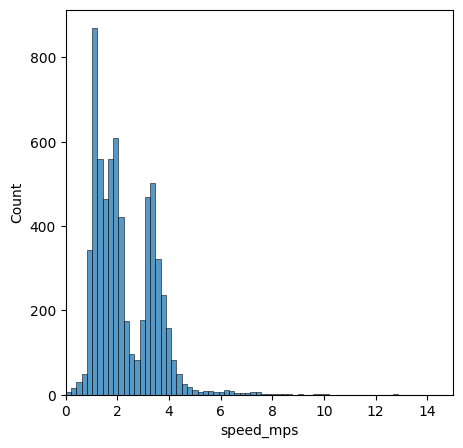

In [191]:
avg_speed = gpx_df['speed_mps'].mean()
print(f'Average Speed: {avg_speed}')

plt.figure(figsize=(5,5))
plt.xlim(0, 15)
sns.histplot(gpx_df['speed_mps'])
plt.show()


Average Pace: 10.062985860502959


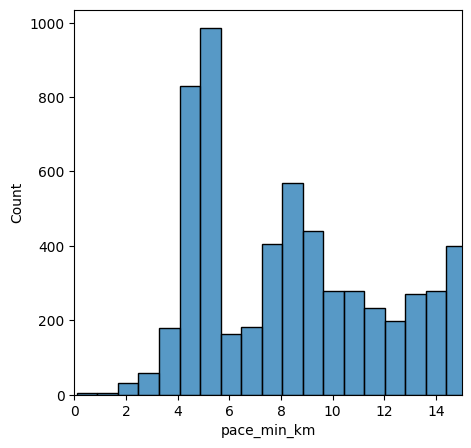

Average Pace: 10.058849998453253


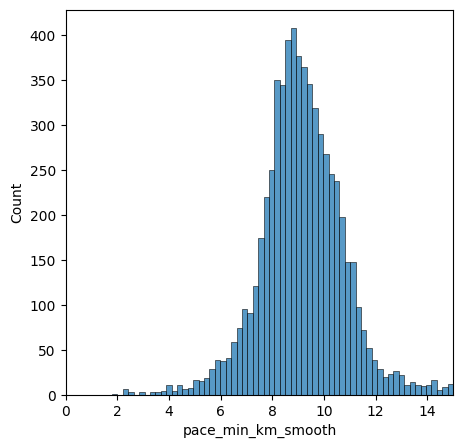

Average Pace: 10.061286934382402


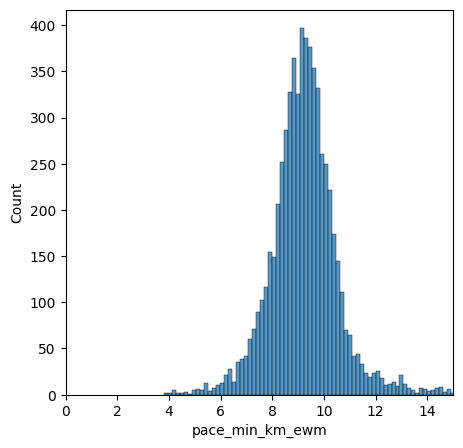

In [192]:
pace_metrics_check = ['pace_min_km', 'pace_min_km_smooth', 'pace_min_km_ewm']

for pace in pace_metrics_check:

  avg_pace = gpx_df[pace].mean()
  print(f'Average Pace: {avg_pace}')

  plt.figure(figsize=(5,5))
  plt.xlim(0, 15)
  sns.histplot(gpx_df[pace])
  plt.show()


In [196]:
gpx_df.head()

,lat,lon,elev,time,distance_m,speed_mps,cum_distance_m,time_diff_seconds,pace_min_km,pace_min_km_smooth,pace_min_km_ewm,pace_sec_100m,pace_sec_100m_smooth
0,-6.238588,106.857148,23.5,2025-11-22 22:16:53+00:00,0.000000,None,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
1,-6.238588,106.857148,23.5,2025-11-22 22:16:54+00:00,0.000000,None,0.000000,1.0,NaN,NaN,NaN,NaN,NaN
2,-6.238611,106.857133,23.5,2025-11-22 22:16:55+00:00,3.051338,3.051338,3.051338,1.0,5.462085,NaN,5.462085,32.772508,NaN
3,-6.238609,106.857123,23.5,2025-11-22 22:16:56+00:00,1.128777,1.128777,4.180115,1.0,14.765244,NaN,10.630507,88.591467,NaN
4,-6.238611,106.857119,23.5,2025-11-22 22:16:57+00:00,0.495479,0.495479,4.675594,1.0,33.637501,18.594082,20.059603,201.825007,111.564494


In [197]:
total_dist = gpx_df["cum_distance_m"].iloc[-1] / 1000
print(total_dist)


14.802409380640569


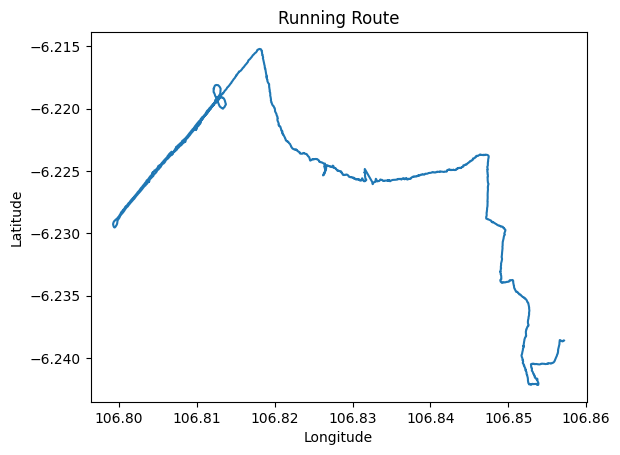

In [82]:
import matplotlib.pyplot as plt

plt.plot(gpx_sample_df["lon"], gpx_sample_df["lat"])
plt.title("Running Route")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


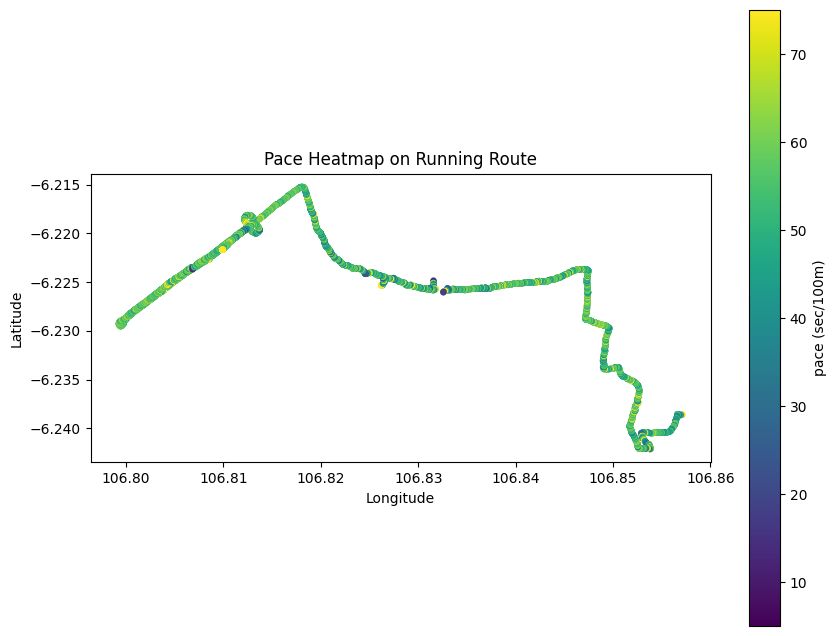

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(
    gpx_df["lon"],
    gpx_df["lat"],
    c=gpx_df["pace_sec_100m_smooth"],     # color based on pace
    cmap="viridis",          # vibrant color map suitable for speed
    s=12                   # marker size
)

plt.colorbar(label="pace (sec/100m)")
plt.clim(5, 75)
plt.title("Pace Heatmap on Running Route")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect("equal", adjustable="box")

plt.show()


/tmp/ipython-input-1138402412.py:52: UserWarning: Glyph 128034 (\N{TURTLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128034 (\N{TURTLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


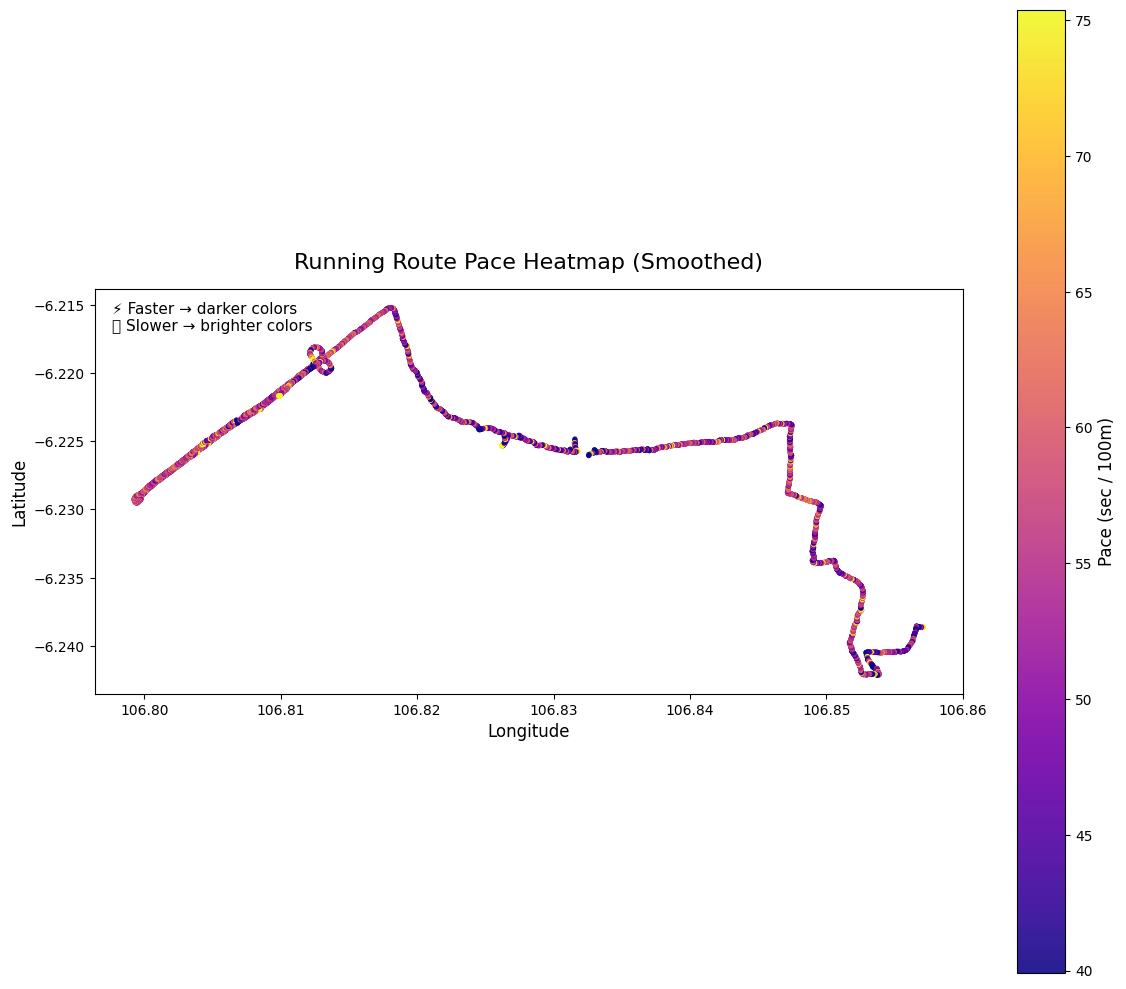

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare figure
plt.figure(figsize=(12, 10))

# Pace values for color scaling
pace_vals = gpx_df["pace_sec_100m_smooth"]

# Calculate reasonable color limits
vmin = max(10, np.percentile(pace_vals.dropna(), 5))   # lower bound
vmax = min(80, np.percentile(pace_vals.dropna(), 95))  # upper bound

# Scatter plot of running route
sc = plt.scatter(
    gpx_df["lon"],
    gpx_df["lat"],
    c=pace_vals,
    cmap="plasma",          # better contrast for pace
    s=14,                   # slightly larger & user-friendly
    alpha=0.9,
    edgecolor="none"
)

# Colorbar styling
cbar = plt.colorbar(sc)
cbar.set_label("Pace (sec / 100m)", fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Add title & axis labels
plt.title("Running Route Pace Heatmap (Smoothed)", fontsize=16, pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Cleaner look
plt.grid(False)
plt.gca().set_aspect("equal", adjustable="box")

# Clipping range based on actual run pace
plt.clim(vmin, vmax)

# Fast / Slow annotation
plt.text(
    0.02, 0.97,
    "⚡ Faster → darker colors\n🐢 Slower → brighter colors",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.6)
)

plt.tight_layout()
plt.show()


In [134]:
import numpy as np

pace = gpx_df["pace_sec_100m_smooth"].dropna()

# Define boundaries
fast_thr = np.percentile(pace, 33)     # fastest 1/3
slow_thr = np.percentile(pace, 66)     # slowest 1/3

# Assign zone label
def classify_zone(x):
    if x <= fast_thr:
        return "Fast"
    elif x <= slow_thr:
        return "Medium"
    else:
        return "Slow"

gpx_df["pace_zone"] = gpx_df["pace_sec_100m_smooth"].apply(classify_zone)


In [135]:
zone_colors = {
    "Fast":  "#1f77b4",   # blue
    "Medium": "#ffbf00",  # yellow-orange
    "Slow":  "#d62728"    # red
}


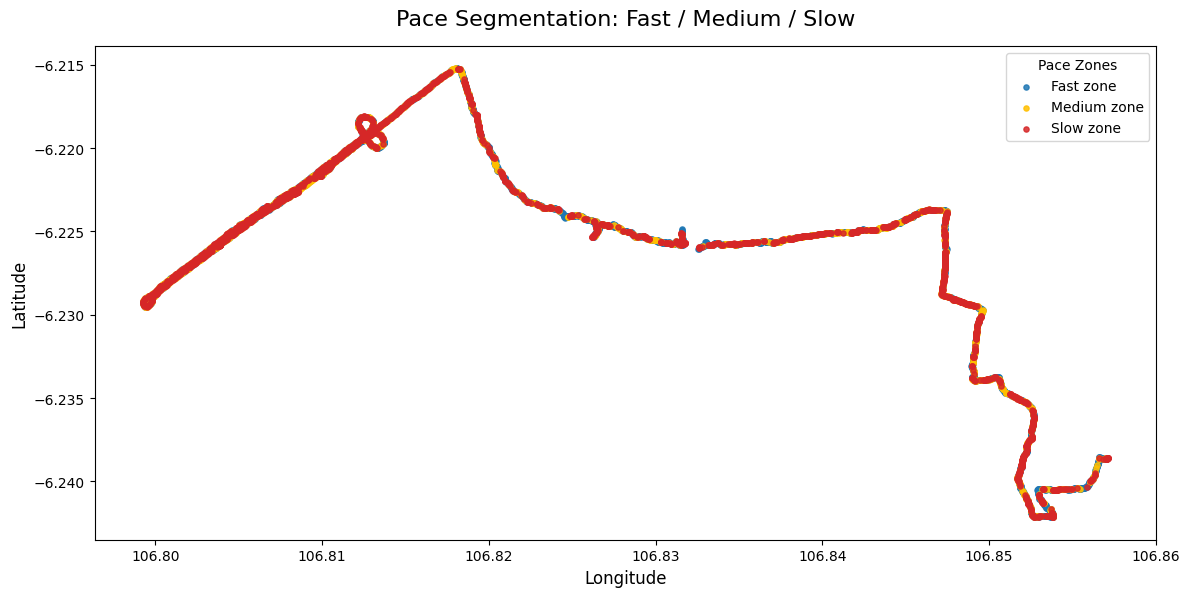

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

for zone in ["Fast", "Medium", "Slow"]:
    subset = gpx_df[gpx_df["pace_zone"] == zone]
    plt.scatter(
        subset["lon"],
        subset["lat"],
        s=14,
        color=zone_colors[zone],
        label=f"{zone} zone",
        alpha=0.85
    )

plt.title("Pace Segmentation: Fast / Medium / Slow", fontsize=16, pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.gca().set_aspect("equal", adjustable="box")

plt.legend(title="Pace Zones")
plt.grid(False)
plt.tight_layout()
plt.show()


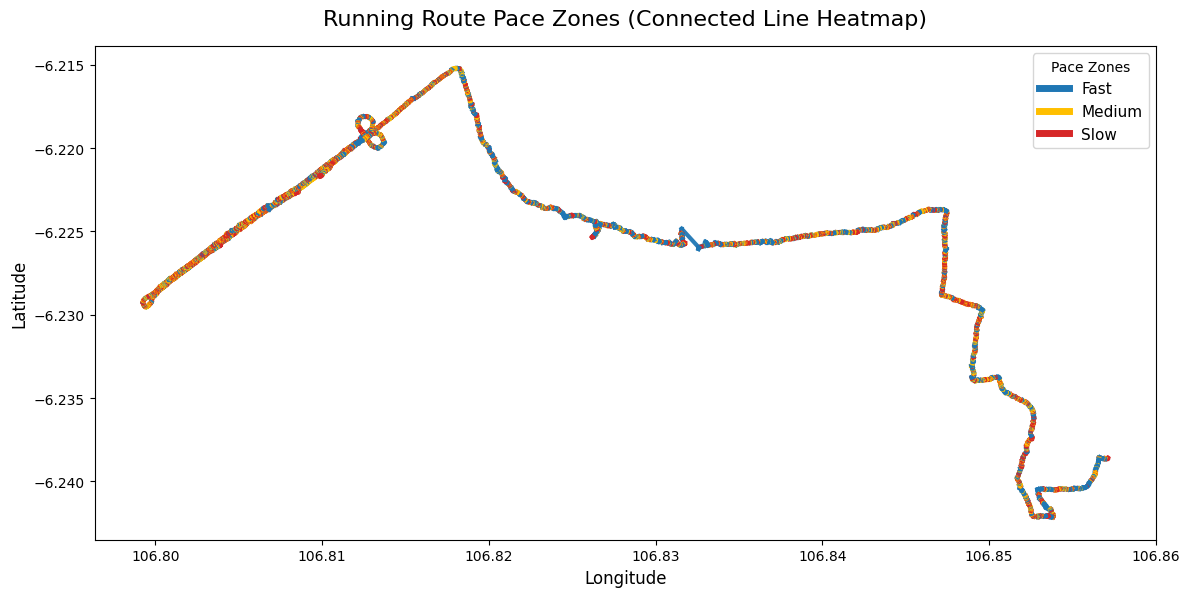

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Iterate through consecutive point pairs
for i in range(len(gpx_df) - 1):
    lat1, lon1 = gpx_df.lat.iloc[i], gpx_df.lon.iloc[i]
    lat2, lon2 = gpx_df.lat.iloc[i+1], gpx_df.lon.iloc[i+1]
    zone = gpx_df.pace_zone.iloc[i]

    plt.plot(
        [lon1, lon2],
        [lat1, lat2],
        color=zone_colors[zone],
        linewidth=3,
        alpha=0.95
    )

plt.title("Running Route Pace Zones (Connected Line Heatmap)", fontsize=16, pad=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.gca().set_aspect("equal", adjustable="box")

# Custom legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=zone_colors["Fast"], lw=5, label="Fast"),
    Line2D([0], [0], color=zone_colors["Medium"], lw=5, label="Medium"),
    Line2D([0], [0], color=zone_colors["Slow"], lw=5, label="Slow")
]

plt.legend(handles=legend_elements, title="Pace Zones", fontsize=11)

plt.grid(False)
plt.tight_layout()
plt.show()


In [139]:
import numpy as np

pace = gpx_df["pace_sec_100m_smooth"].fillna(method="bfill").fillna(method="ffill")

# normalize pace between 0 and 1
norm = (pace - pace.min()) / (pace.max() - pace.min())


/tmp/ipython-input-1328554330.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pace = gpx_df["pace_sec_100m_smooth"].fillna(method="bfill").fillna(method="ffill")


In [140]:
import matplotlib.pyplot as plt
cmap = plt.cm.plasma

/tmp/ipython-input-19411205.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pace = gpx_df["pace_sec_100m_smooth"].fillna(method="bfill").fillna(method="ffill")


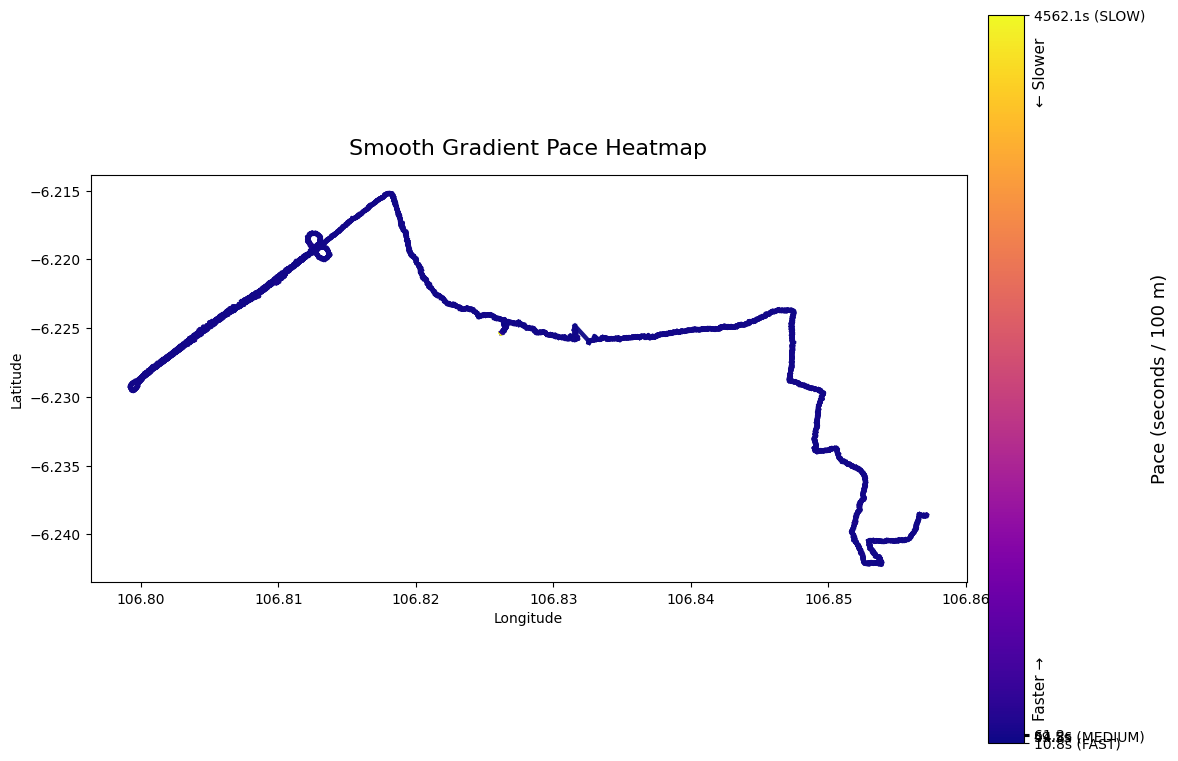

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare pace data
pace = gpx_df["pace_sec_100m_smooth"].fillna(method="bfill").fillna(method="ffill")

# Normalize 0–1
norm = (pace - pace.min()) / (pace.max() - pace.min())

# Colormap
cmap = plt.cm.plasma

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))

# Draw connecting gradient segments
for i in range(len(gpx_df) - 1):
    lat1, lon1 = gpx_df.lat.iloc[i], gpx_df.lon.iloc[i]
    lat2, lon2 = gpx_df.lat.iloc[i+1], gpx_df.lon.iloc[i+1]

    ax.plot(
        [lon1, lon2],
        [lat1, lat2],
        color=cmap(norm.iloc[i]),
        linewidth=3.2,
        alpha=0.95
    )

# --- Create dummy mappable for colorbar ---
sm = plt.cm.ScalarMappable(
    cmap=cmap,
    norm=plt.Normalize(vmin=pace.min(), vmax=pace.max())
)
sm.set_array([])

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.75, pad=0.02)

# Title for legend
cbar.set_label("Pace (seconds / 100 m)", fontsize=13)

# Custom ticks
ticks = [
    pace.min(),
    np.percentile(pace, 25),
    np.percentile(pace, 50),
    np.percentile(pace, 75),
    pace.max()
]

cbar.set_ticks(ticks)

# Custom tick labels: Fast → Slow
cbar.set_ticklabels([
    f"{ticks[0]:.1f}s (FAST)",
    f"{ticks[1]:.1f}s",
    f"{ticks[2]:.1f}s (MEDIUM)",
    f"{ticks[3]:.1f}s",
    f"{ticks[4]:.1f}s (SLOW)"
])

# OPTIONAL: add arrow annotations for clarity
cbar.ax.text(
    1.25, 0.03, "Faster →", rotation=90,
    transform=cbar.ax.transAxes, fontsize=11, va="bottom"
)
cbar.ax.text(
    1.25, 0.97, "← Slower", rotation=90,
    transform=cbar.ax.transAxes, fontsize=11, va="top"
)

# Formatting plot
ax.set_title("Smooth Gradient Pace Heatmap", fontsize=16, pad=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect("equal", adjustable="box")
ax.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[gpx_sample_df["lat"].mean(), gpx_sample_df["lon"].mean()], zoom_start=15)

HeatMap(
    data=gpx_sample_df[['lat','lon','speed_kmh']].values,
    radius=8,
    max_zoom=13
).add_to(m)

m.save("/content/drive/MyDrive/Exploration Data Field/Personal Project/Strava/speed_heatmap.html")
